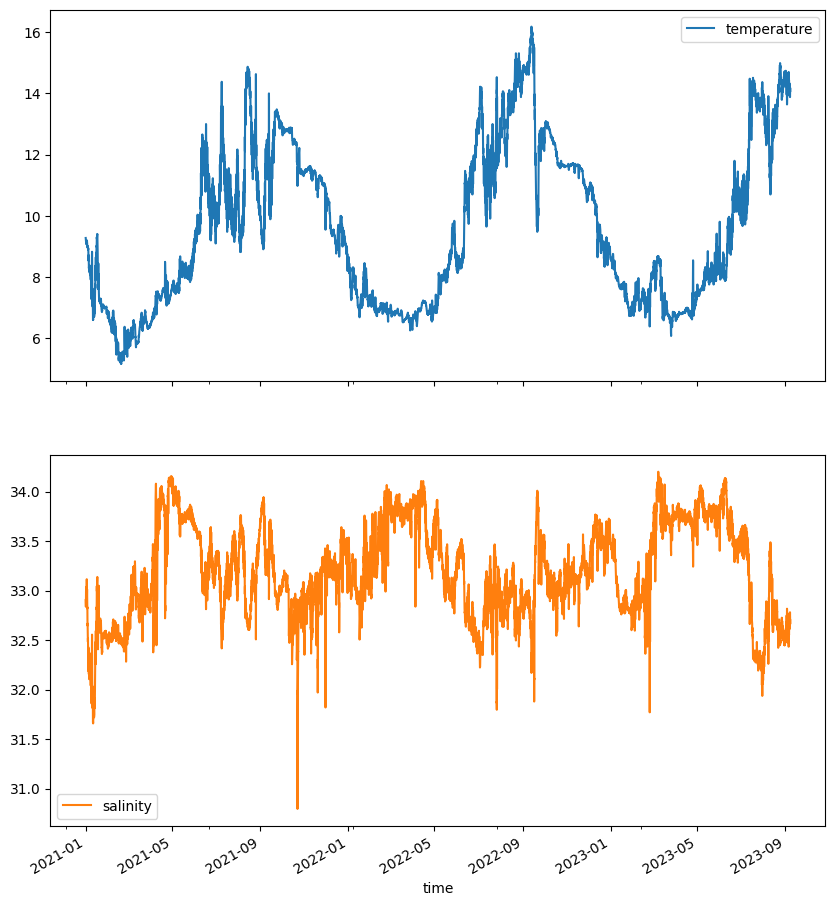

In [27]:
import pandas as pd

import matplotlib.pyplot as plt

# Load the dataset
#df_loaded = pd.read_csv('data/filtered_austevoll_nord_data_astrid_not_cropped.csv', parse_dates=['Date'])
df_loaded = pd.read_csv('data/havvarsel_salinity_and_temperature_2021_to_2023.csv', parse_dates=['time'])

# Plot the data
df_loaded.head()
df_loaded.set_index('time').plot(subplots=True, figsize=(10, 12))
plt.show()

<AxesSubplot: >

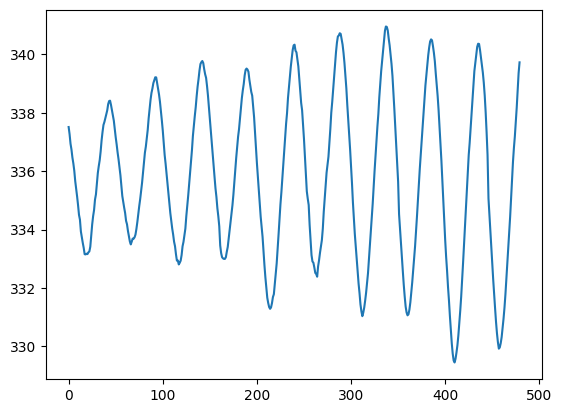

In [33]:
import pandas as pd

import matplotlib.pyplot as plt

# Load the dataset
df_loaded = pd.read_csv('data/filtered_austevoll_nord_data_astrid_not_cropped.csv', parse_dates=['Date'])
df_loaded["Pressure"][:48*10].plot()


# Daily, weekly and montly averages

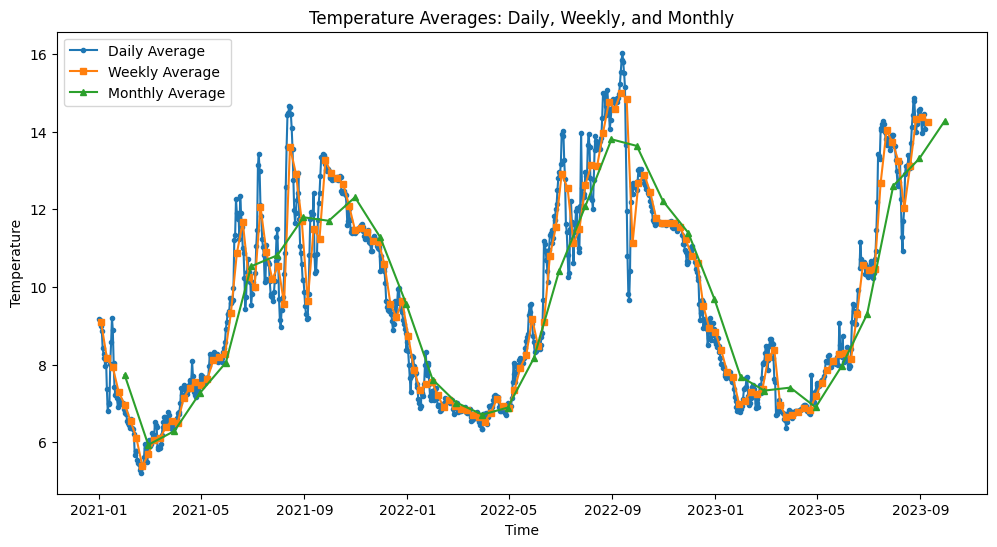

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset (Assuming df_loaded is already loaded as per your example)
# If not, replace with the appropriate loading method
df_loaded = pd.read_csv('data/havvarsel_2021_to_2023.csv', parse_dates=['time'])

# Calculate daily max and min values for 96-sample chunks
max_vals = []
min_vals = []
for i in range(0, len(df_loaded), 96):
    chunk = df_loaded["temperature"].iloc[i:i+96]
    max_vals.append(chunk.max())
    min_vals.append(chunk.min())

# Convert the list to numpy arrays for easier manipulation
max_vals = np.array(max_vals)
min_vals = np.array(min_vals)
dif = max_vals - min_vals

# Create a pandas DataFrame to handle the time-based aggregation
df_temp = pd.DataFrame({
    'max_temperature': max_vals,
    'min_temperature': min_vals,
    'difference': dif
})

# Assume we already have a 'time' column in df_loaded, convert it to datetime
df_loaded['time'] = pd.to_datetime(df_loaded['time'])

# Resample data to calculate daily, weekly, and monthly averages
df_loaded.set_index('time', inplace=True)

# Resample by day, week, and month
daily_avg = df_loaded.resample('D').mean()
weekly_avg = df_loaded.resample('W').mean()
monthly_avg = df_loaded.resample('M').mean()

# Plotting
plt.figure(figsize=(12, 6))

# Plot daily, weekly, and monthly averages
plt.plot(daily_avg['temperature'], label='Daily Average', marker='o', linestyle='-', markersize=3)
plt.plot(weekly_avg['temperature'], label='Weekly Average', marker='s', linestyle='-', markersize=4)
plt.plot(monthly_avg['temperature'], label='Monthly Average', marker='^', linestyle='-', markersize=5)

# Add title, labels, and legend
plt.title("Temperature Averages: Daily, Weekly, and Monthly")
plt.xlabel("Time")
plt.ylabel("Temperature")
plt.legend()

# Show the plot
plt.show()


# Plotting the origial data

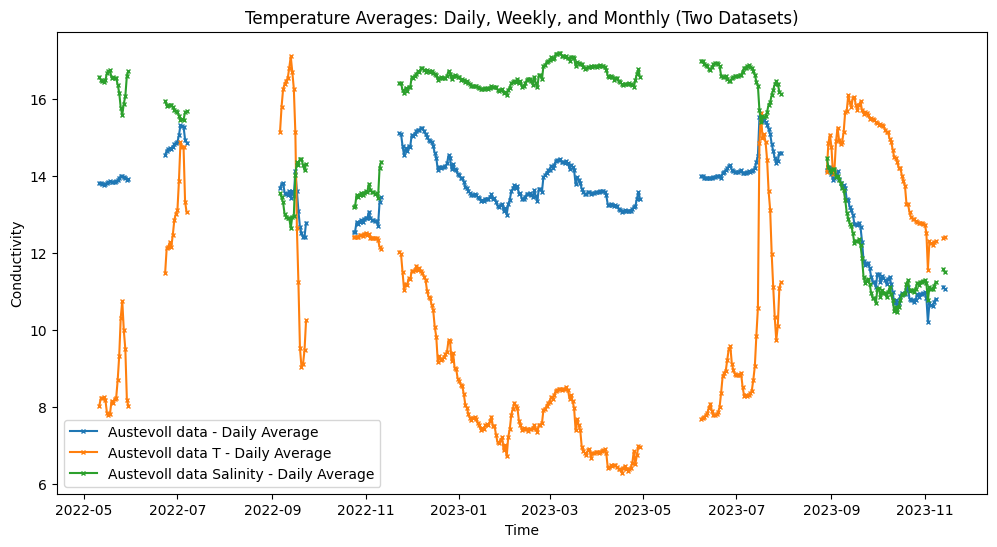

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the first dataset
df_loaded = pd.read_csv('data/havvarsel_2021_to_2023.csv', parse_dates=['time'])

# Calculate daily max and min values for 96-sample chunks
max_vals = []
min_vals = []
for i in range(0, len(df_loaded), 96):
    chunk = df_loaded["temperature"].iloc[i:i+96]
    max_vals.append(chunk.max())
    min_vals.append(chunk.min())

# Convert the list to numpy arrays for easier manipulation
max_vals = np.array(max_vals)
min_vals = np.array(min_vals)
dif = max_vals - min_vals

# Create a pandas DataFrame to handle the time-based aggregation
df_temp = pd.DataFrame({
    'max_temperature': max_vals,
    'min_temperature': min_vals,
    'difference': dif
})

# Convert the 'time' column to datetime and set as index
df_loaded['time'] = pd.to_datetime(df_loaded['time'])
df_loaded.set_index('time', inplace=True)

# Resample data to calculate daily, weekly, and monthly averages
daily_avg_1 = df_loaded.resample('D').mean()
weekly_avg_1 = df_loaded.resample('W').mean()
monthly_avg_1 = df_loaded.resample('M').mean()

# Load the second dataset
df_loaded_2 = pd.read_csv('data/filtered_austevoll_nord_data_astrid_not_cropped.csv', parse_dates=['Date'])

# Resample data for the second dataset
df_loaded_2['Date'] = pd.to_datetime(df_loaded_2['Date'])
df_loaded_2.set_index('Date', inplace=True)

daily_avg_2 = df_loaded_2.resample('D').mean()
weekly_avg_2 = df_loaded_2.resample('W').mean()
monthly_avg_2 = df_loaded_2.resample('M').mean()

# Plotting
plt.figure(figsize=(12, 6))

# Plot daily, weekly, and monthly averages for the first dataset
#plt.plot(daily_avg_1['temperature'], label='First Dataset - Daily Average', marker='o', linestyle='-', markersize=3)
#plt.plot(weekly_avg_1['temperature'], label='First Dataset - Weekly Average', marker='s', linestyle='-', markersize=4)
#plt.plot(monthly_avg_1['temperature'], label='First Dataset - Monthly Average', marker='^', linestyle='-', markersize=5)

#Plot daily, weekly, and monthly averages for the second dataset
column = 'Conductivity'
plt.plot(daily_avg_2[column]*4, label='Austevoll data - Daily Average', marker='x', linestyle='-', markersize=3)
plt.plot(daily_avg_2["Temperature"], label='Austevoll data T - Daily Average', marker='x', linestyle='-', markersize=3)
plt.plot(daily_avg_2["Salinity"]*0.5, label='Austevoll data Salinity - Daily Average', marker='x', linestyle='-', markersize=3)
#plt.plot(weekly_avg_2[column], label='Austevoll data - Weekly Average', marker='d', linestyle='-', markersize=4)
#plt.plot(monthly_avg_2[column], label='Austevoll data - Monthly Average', marker='*', linestyle='-', markersize=5)

# Add title, labels, and legend
plt.title("Temperature Averages: Daily, Weekly, and Monthly (Two Datasets)")
plt.xlabel("Time")
plt.ylabel(column)
plt.legend()

# Show the plot
plt.show()


# GETTING THE MEAN VALUE FOR EACH COLUMN

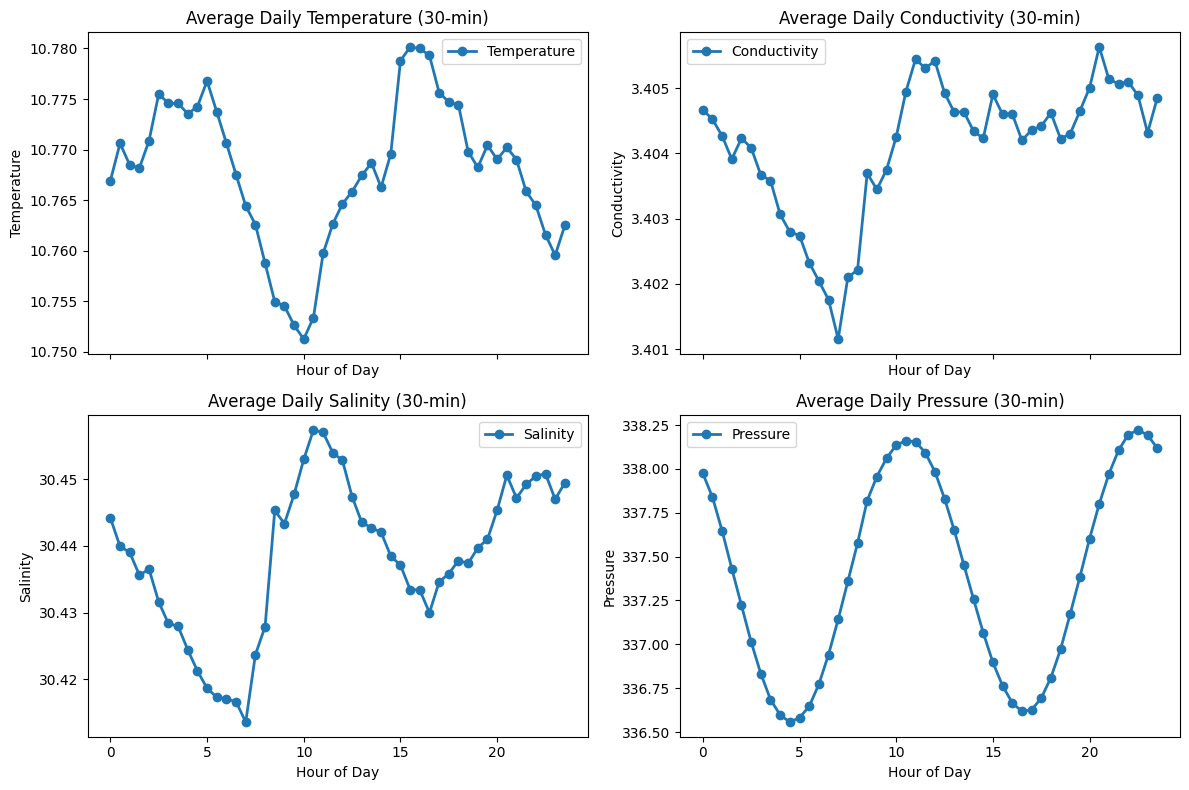

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
df_loaded = pd.read_csv('data/filtered_austevoll_nord_data_astrid_not_cropped.csv', parse_dates=['Date'])

# 1) Convert "Date" to datetime and set as index
df_loaded['Date'] = pd.to_datetime(df_loaded['Date'])
df_loaded.set_index('Date', inplace=True)
df_loaded.sort_index(inplace=True)

# 2) Resample to a strict 30-minute frequency, computing the mean in each bucket
df_30min = df_loaded.resample('30T').mean()

# 3) Interpolate to fill missing half-hour slots
df_30min.interpolate(method='time', inplace=True)

# 4) Extract the day and time-of-day from the index
df_30min['day'] = df_30min.index.floor('D')  # e.g., 2022-05-11
df_30min['tod'] = df_30min.index.time        # e.g., 07:30:00

# 5) Group by time-of-day and compute the mean for each variable of interest
#    (You could select columns explicitly if your DataFrame has more columns)
cols_of_interest = ['Temperature', 'Conductivity', 'Salinity', 'Pressure']
df_mean_pattern = df_30min.groupby('tod')[cols_of_interest].mean()

# 6) Sort by the actual clock time so we go from 00:00 to 23:30
df_mean_pattern = df_mean_pattern.sort_index()

# 7) Build a numeric time axis (in hours) for plotting
time_axis = [t.hour + t.minute / 60.0 for t in df_mean_pattern.index]

# 8) Plot: one subplot per variable
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8), sharex=True)
axes = axes.flatten()  # turn 2x2 array of Axes into a flat list

for ax, var in zip(axes, cols_of_interest):
    ax.plot(time_axis, df_mean_pattern[var], marker='o', linewidth=2, label=var)
    ax.set_title(f'Average Daily {var} (30-min)')
    ax.set_xlabel('Hour of Day')
    ax.set_ylabel(var)
    ax.legend()

plt.tight_layout()
plt.show()


# CREATING CSV DATASET BASED ON MEAN DAILY VALUES FOR EACH COLUMN

In [ ]:
import pandas as pd
import numpy as np
import os
from scipy.stats import norm

# Ensure the folder exists
os.makedirs('data', exist_ok=True)

# Generate a date range for every hour over 6 years
date_rng = pd.date_range(start='2000-01-01', end='2020-01-01 23:00:00', freq='30min')

# Create a DataFrame with the date range
df = pd.DataFrame(date_rng, columns=['Date'])

# Calculate day of year for seasonal patterns
df['hour_of_day'] = df['Date'].dt.hour

# Constants for Gaussian noise
mean_noise = 0  # Mean of the Gaussian noise
std_noise = 0.001  # Standard deviation of the Gaussian noise. 0 Will result in no noise.

df_mean_pattern["Temperature"] = df_mean_pattern["Temperature"] - df_mean_pattern["Temperature"].mean()

# Use the mean_pattern for temperature generation by mapping each timestamp to its 30-min interval index in the day.
pattern_index = ((df['Date'].dt.hour * 60 + df['Date'].dt.minute) // 30).values.astype(int)
df['Temperature'] = df_mean_pattern["Temperature"].iloc[pattern_index].values + norm.rvs(loc=mean_noise, scale=std_noise*0.5, size=len(df))

# Use the mean_pattern for temperature generation by mapping each timestamp to its 30-min interval index in the day.
pattern_index = ((df['Date'].dt.hour * 60 + df['Date'].dt.minute) // 30).values.astype(int)
df['Conductivity'] = df_mean_pattern["Conductivity"].iloc[pattern_index].values + norm.rvs(loc=mean_noise, scale=std_noise*0.1, size=len(df))

df_mean_pattern["Salinity"] = df_mean_pattern["Salinity"] - df_mean_pattern["Salinity"].mean()

# Use the mean_pattern for temperature generation by mapping each timestamp to its 30-min interval index in the day.
pattern_index = ((df['Date'].dt.hour * 60 + df['Date'].dt.minute) // 30).values.astype(int)
df['Salinity'] = df_mean_pattern["Salinity"].iloc[pattern_index].values + norm.rvs(loc=mean_noise, scale=std_noise, size=len(df))

# Use the mean_pattern for temperature generation by mapping each timestamp to its 30-min interval index in the day.
pattern_index = ((df['Date'].dt.hour * 60 + df['Date'].dt.minute) // 30).values.astype(int)
df['Pressure'] = df_mean_pattern["Pressure"].iloc[pattern_index].values + norm.rvs(loc=mean_noise, scale=std_noise*30, size=len(df))


# Select the final columns
df_final = df[['Date', 'Temperature', 'Conductivity', 'Pressure', 'Salinity']]

# Save the dataset to a CSV file
df_final.to_csv('data/synthetic_data_normal.csv', index=False)

print("Dataset generated and saved as 'synthetic_data.csv'.")


Dataset generated and saved as 'synthetic_data.csv'.


# PLOT OF FIVE DAYS OF DATA FOR EACH COLUMN

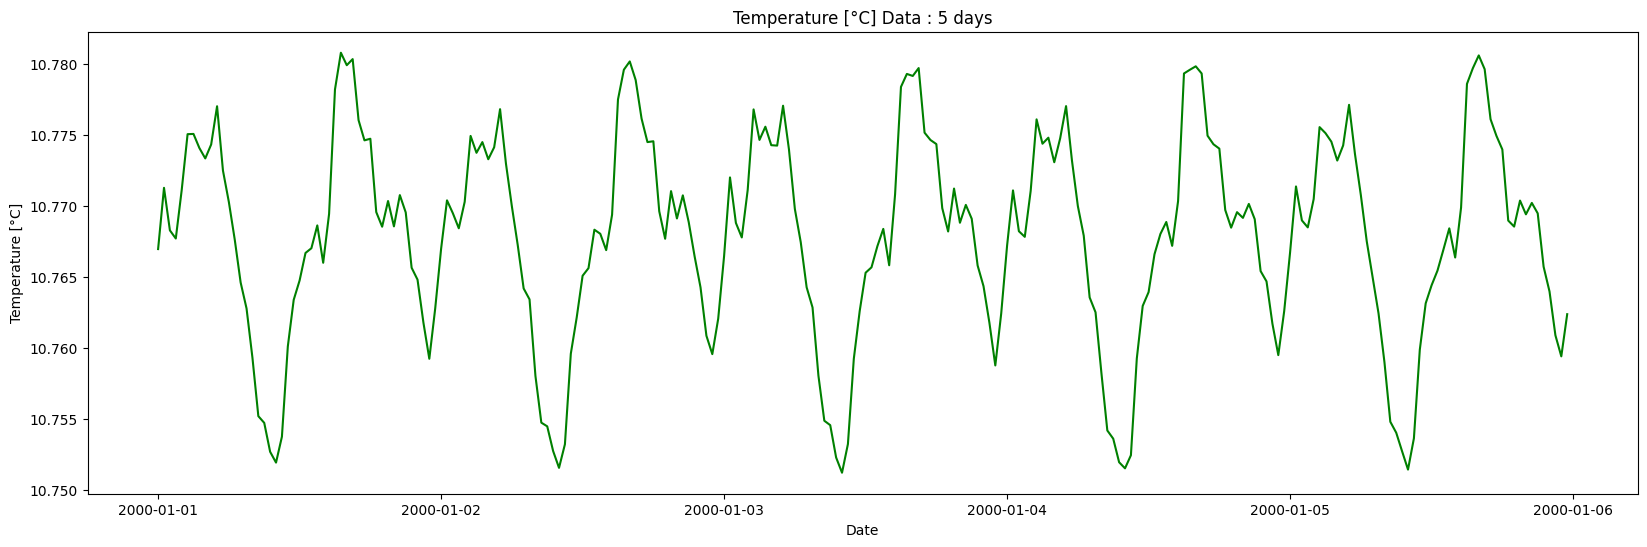

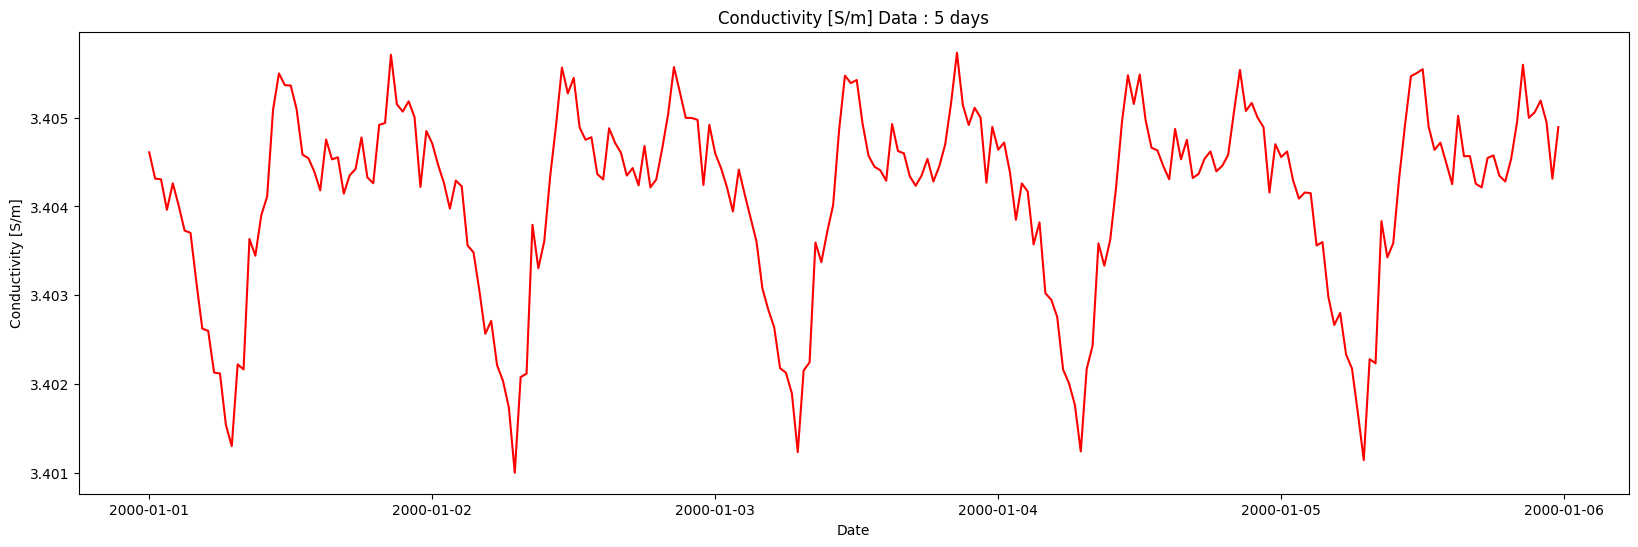

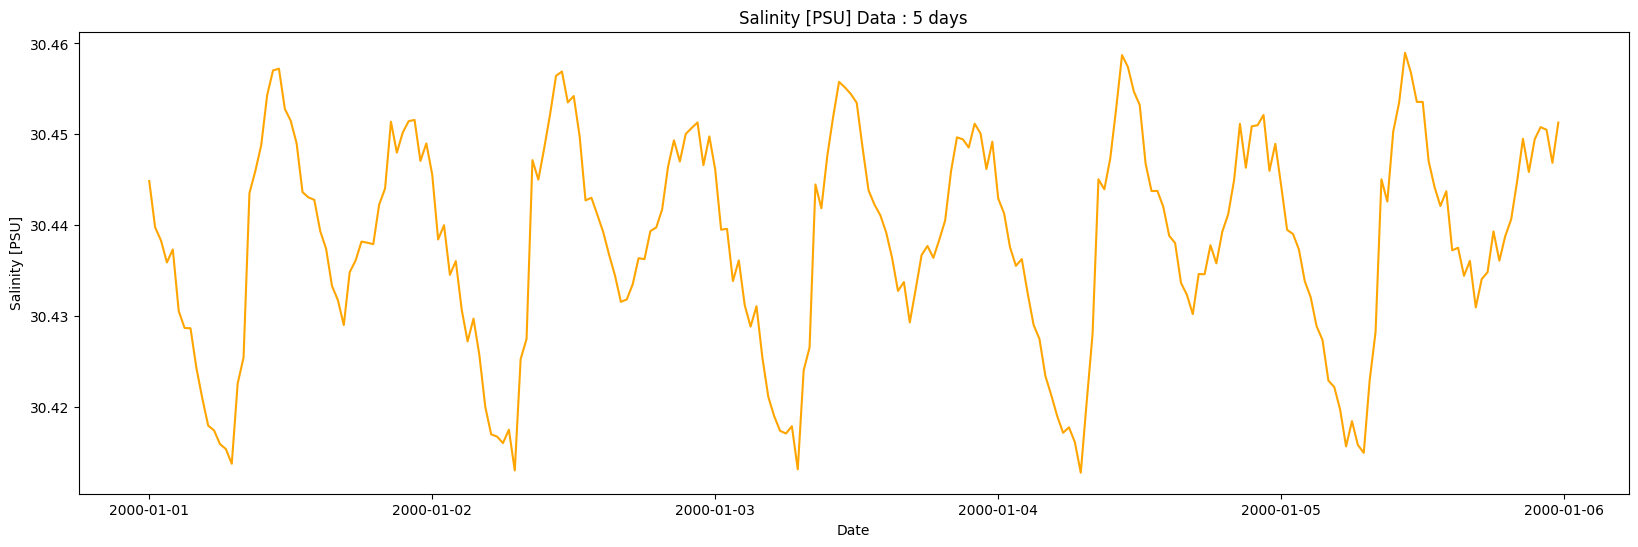

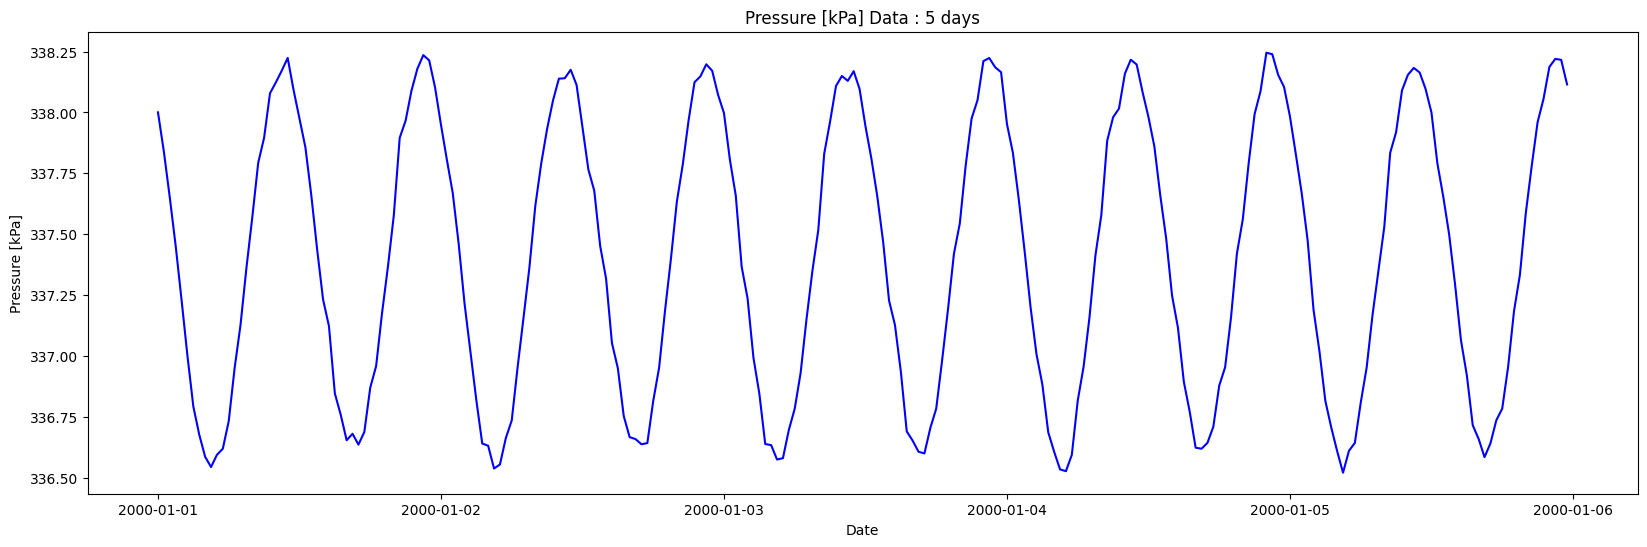

In [97]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df_loaded = pd.read_csv('data/synthetic_data_normal.csv', parse_dates=['Date'])
df_loaded.head()

# Plot only the "Temperature" column for the first 5 days (assuming 48 samples/day)
plt.figure(figsize=(20, 6))
plt.plot(df_loaded[:48*5].set_index("Date")["Temperature"], color="Green")
plt.title("Temperature [°C] Data : 5 days")
plt.ylabel("Temperature [°C]")
plt.xlabel("Date")
plt.show()

# Conductivity
plt.figure(figsize=(20, 6))
plt.plot(df_loaded[:48*5].set_index("Date")["Conductivity"], color="Red")
plt.title("Conductivity [S/m] Data : 5 days")
plt.ylabel("Conductivity [S/m]")
plt.xlabel("Date")
plt.show()

# Salinity
plt.figure(figsize=(20, 6))
plt.plot(df_loaded[:48*5].set_index("Date")["Salinity"], color="Orange")
plt.title("Salinity [PSU] Data : 5 days")
plt.ylabel("Salinity [PSU]")
plt.xlabel("Date")
plt.show()

# Pressure
plt.figure(figsize=(20, 6))
plt.plot(df_loaded[:48*5].set_index("Date")["Pressure"], color="Blue")
plt.title("Pressure [kPa] Data : 5 days")
plt.ylabel("Pressure [kPa]")
plt.xlabel("Date")
plt.show()

# Finding and plotting the 1 year mean temperature chage from 3 years

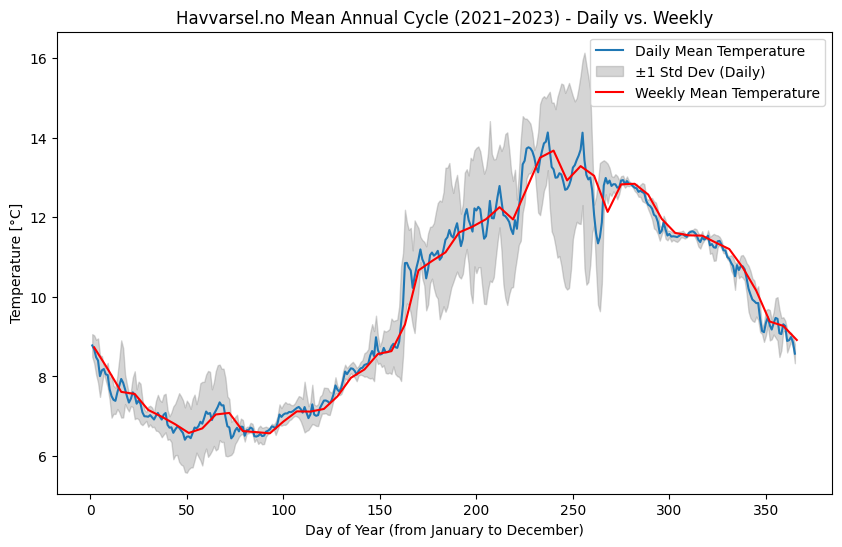

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load the dataset (3 years of data) and parse the 'time' column as datetime
df_loaded = pd.read_csv('data/havvarsel_2021_to_2023.csv', parse_dates=['time'])

# 2. Ensure 'time' is in datetime format (redundant if parse_dates above is used, but safe to include)
df_loaded['time'] = pd.to_datetime(df_loaded['time'])

# 3. Create a "day_of_year" column (1–365 or 1–366 for leap years)
df_loaded['day_of_year'] = df_loaded['time'].dt.dayofyear

# 4. Group by 'day_of_year' and calculate mean and std across all years
grouped = df_loaded.groupby('day_of_year')['temperature']
mean_annual_cycle = grouped.mean()    # Daily mean for each day-of-year
std_annual_cycle  = grouped.std()     # Daily std dev for each day-of-year

# ----------------------------------------------------------------------------
# 4a. Create a dummy daily DateTimeIndex so we can resample from daily → weekly
#     1) Determine the total number of days from 1 to the max day in your dataset
#     2) Generate a date range in a "dummy" non-leap year (e.g., 2000)
#     3) Convert your 'mean_annual_cycle' into a time series with that date index
#     4) Resample weekly to get the weekly mean cycle.
# ----------------------------------------------------------------------------
n_days = mean_annual_cycle.index.max()  # typically 365 or 366
daily_dates = pd.date_range('2000-01-01', periods=n_days, freq='D')

# Make sure mean_annual_cycle is aligned with this daily_dates index
mean_annual_cycle_daily = pd.Series(mean_annual_cycle.values, index=daily_dates)

# Now resample to weekly frequency
mean_weekly_cycle = mean_annual_cycle_daily.resample('W').mean()

# 5. Plotting
plt.figure(figsize=(10, 6))

# (a) Plot the daily mean annual cycle
plt.plot(
    mean_annual_cycle.index,
    mean_annual_cycle.values,
    label='Daily Mean Temperature',
    marker='',
    linestyle='-'
)

# (b) Plot ±1 standard deviation shading for daily cycle
plt.fill_between(
    mean_annual_cycle.index,
    mean_annual_cycle.values - std_annual_cycle.values,
    mean_annual_cycle.values + std_annual_cycle.values,
    alpha=0.33,
    color='gray',
    label='±1 Std Dev (Daily)'
)

# (c) Plot the weekly mean annual cycle
#     Using the `.dayofyear` so it lines up in a single 1–365 range.
plt.plot( 
    mean_weekly_cycle.index.dayofyear,
    mean_weekly_cycle.values,
    label='Weekly Mean Temperature',
    color='red',
    #marker='',
    #linestyle=''
)

# Add labels, title, and legend
plt.title("Havvarsel.no Mean Annual Cycle (2021–2023) - Daily vs. Weekly")
plt.xlabel("Day of Year (from January to December)")
plt.ylabel("Temperature [°C]")
plt.legend()

plt.show()


# Moving average on the mean year temperature to generalize the pattern

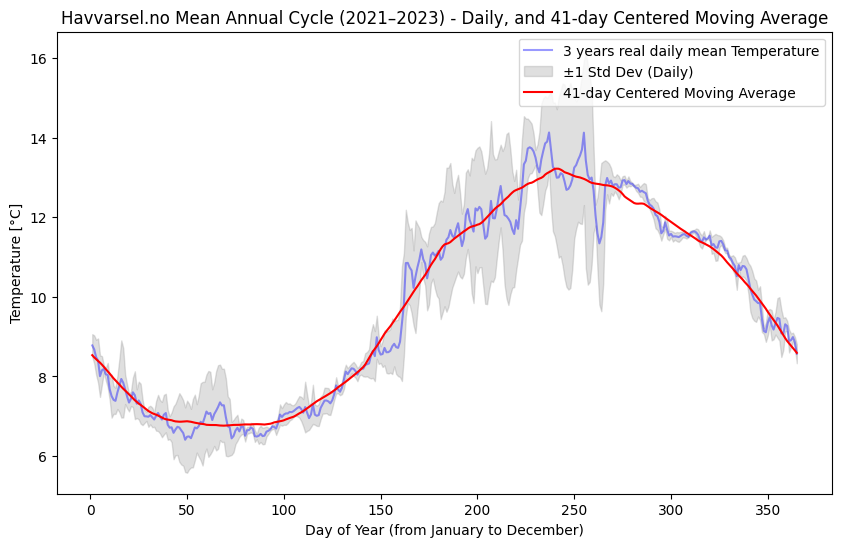

day_of_year
1     8.534153
2     8.479393
3     8.432728
4     8.388152
5     8.346285
6     8.296729
7     8.238337
8     8.182527
9     8.129268
10    8.071941
Name: temperature, dtype: float64 day_of_year
356    9.203005
357    9.123408
358    9.040681
359    8.963330
360    8.891937
361    8.830259
362    8.772578
363    8.714448
364    8.655002
365    8.592837
Name: temperature, dtype: float64


In [169]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load the dataset (3 years of data) and parse the 'time' column as datetime
df_loaded = pd.read_csv('data/havvarsel_salinity_and_temperature_2021_to_2023.csv', parse_dates=['time'])

# 2. Ensure 'time' is in datetime format
df_loaded['time'] = pd.to_datetime(df_loaded['time'])

# 3. Create a "day_of_year" column (1–365 or 1–366 for leap years)
df_loaded['day_of_year'] = df_loaded['time'].dt.dayofyear

# 4. Group by 'day_of_year' and calculate mean and std across all years
grouped = df_loaded.groupby('day_of_year')['temperature']
mean_annual_cycle = grouped.mean()    # Daily mean for each day-of-year
std_annual_cycle  = grouped.std()       # Daily std dev for each day-of-year

# 4b. Compute the 7-day moving average (a 7-point moving average)
# This takes the mean over 7 consecutive days, stepping one day at a time.
rolling_size = 41

frames = [mean_annual_cycle[345:365], mean_annual_cycle, mean_annual_cycle[:20]]

mean_annual_cycle_extended = pd.concat(frames)


moving_avg = mean_annual_cycle_extended.rolling(window=rolling_size, min_periods=rolling_size, center=True).mean()


moving_avg = moving_avg[:405-20]
moving_avg = moving_avg[20:]

#moving_avg[1] = mean_annual_cycle[1]
#moving_avg[365] = mean_annual_cycle[1]

moving_avg = moving_avg.interpolate()

# ----------------------------------------------------------------------------
# Create a dummy daily DateTimeIndex to resample the daily means to weekly means.
n_days = mean_annual_cycle.index.max()  # typically 365 or 366
daily_dates = pd.date_range('2000-01-01', periods=n_days, freq='D')

# Align the mean annual cycle with this dummy date index
mean_annual_cycle_daily = pd.Series(mean_annual_cycle.values, index=daily_dates)

# Now resample to weekly frequency
mean_weekly_cycle = mean_annual_cycle_daily.resample('W').mean()

# 5. Plotting
plt.figure(figsize=(10, 6))

# (a) Plot the daily mean annual cycle
plt.plot(
    mean_annual_cycle.index,
    mean_annual_cycle.values,
    label='3 years real daily mean Temperature',
    marker='',
    linestyle='-',
    color='blue',
    alpha=0.4
)

# (b) Plot ±1 standard deviation shading for the daily cycle
plt.fill_between(
    mean_annual_cycle.index,
    mean_annual_cycle.values - std_annual_cycle.values,
    mean_annual_cycle.values + std_annual_cycle.values,
    alpha=0.25,
    color='gray',
    label='±1 Std Dev (Daily)'
)

# (c) Plot the 7-day moving average computed from the daily mean cycle
plt.plot(
    moving_avg.index,
    moving_avg.values,
    label=f'{rolling_size}-day Centered Moving Average',
    color='red',
    #marker='o',
    #linestyle='--'
)

# Add labels, title, and legend
plt.title(f"Havvarsel.no Mean Annual Cycle (2021–2023) - Daily, and {rolling_size}-day Centered Moving Average")
plt.xlabel("Day of Year (from January to December)")
plt.ylabel("Temperature [°C]")
plt.legend()

plt.show()
print(moving_avg[:10], moving_avg[355:])


# Moving average on the mean year salinity to generalize the pattern

405
day_of_year
346   NaN
347   NaN
348   NaN
349   NaN
350   NaN
       ..
16    NaN
17    NaN
18    NaN
19    NaN
20    NaN
Name: salinity, Length: 405, dtype: float64
OK 365
385
365
365
OK day_of_year
1      33.247903
2      33.253139
3      33.098750
4      32.981556
5      32.843847
         ...    
361    33.408979
362    33.431084
363    33.517313
364    33.479584
365    33.339500
Name: salinity, Length: 365, dtype: float64
N_DAYS 365
DAILY_DATES DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10',
               ...
               '2000-12-21', '2000-12-22', '2000-12-23', '2000-12-24',
               '2000-12-25', '2000-12-26', '2000-12-27', '2000-12-28',
               '2000-12-29', '2000-12-30'],
              dtype='datetime64[ns]', length=365, freq='D')


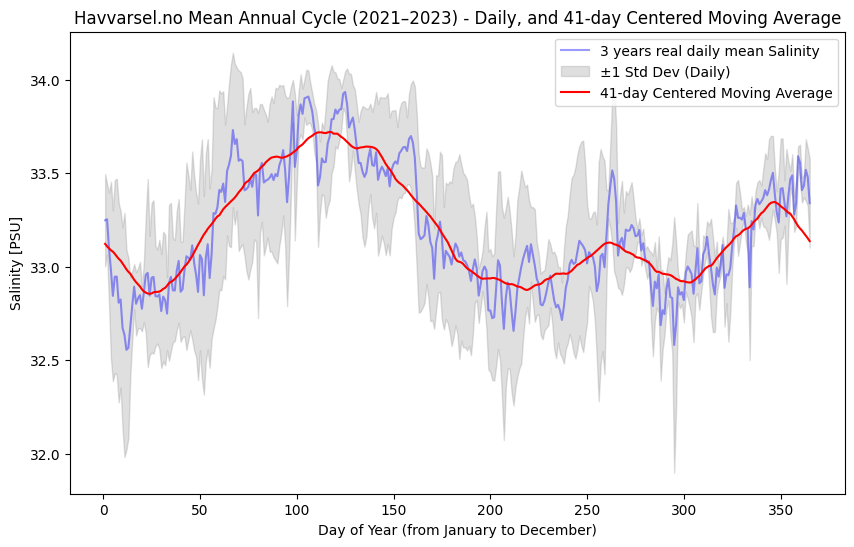

day_of_year
1     33.121814
2     33.108530
3     33.098295
4     33.087427
5     33.080214
6     33.068739
7     33.054657
8     33.042446
9     33.032285
10    33.017201
Name: salinity, dtype: float64 day_of_year
356    33.268283
357    33.252586
358    33.233970
359    33.217291
360    33.204039
361    33.192926
362    33.179136
363    33.165053
364    33.152040
365    33.136486
Name: salinity, dtype: float64


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load the dataset (3 years of data) and parse the 'time' column as datetime
df_loaded = pd.read_csv('data/havvarsel_salinity_and_temperature_2021_to_2023.csv', parse_dates=['time'])

# 2. Ensure 'time' is in datetime format
df_loaded['time'] = pd.to_datetime(df_loaded['time'])

# 3. Create a "day_of_year" column (1–365 or 1–366 for leap years)
df_loaded['day_of_year'] = df_loaded['time'].dt.dayofyear

# 4. Group by 'day_of_year' and calculate mean and std across all years
grouped = df_loaded.groupby('day_of_year')['salinity']
mean_annual_cycle = grouped.mean()    # Daily mean for each day-of-year
std_annual_cycle  = grouped.std()       # Daily std dev for each day-of-year

# 4b. Compute the 7-day moving average (a 7-point moving average)
# This takes the mean over 7 consecutive days, stepping one day at a time.
rolling_size = 41

frames = [mean_annual_cycle[345:365], mean_annual_cycle, mean_annual_cycle[:20]]

mean_annual_cycle_extended = pd.concat(frames)

#mean_annual_cycle_extended = mean_annual_cycle[345:365] + mean_annual_cycle + mean_annual_cycle[:20]

moving_avg = mean_annual_cycle_extended.rolling(window=rolling_size, min_periods=rolling_size, center=True).mean()


moving_avg = moving_avg[:405-20]
moving_avg = moving_avg[20:]

moving_avg = moving_avg.interpolate()

# ----------------------------------------------------------------------------
# Create a dummy daily DateTimeIndex to resample the daily means to weekly means.
n_days = mean_annual_cycle.index.max()  # typically 365 or 366
daily_dates = pd.date_range('2000-01-01', periods=n_days, freq='D')
print("N_DAYS", n_days)
print("DAILY_DATES", daily_dates)
# Align the mean annual cycle with this dummy date index
mean_annual_cycle_daily = pd.Series(mean_annual_cycle.values, index=daily_dates)

# Now resample to weekly frequency
mean_weekly_cycle = mean_annual_cycle_daily.resample('W').mean()

# 5. Plotting
plt.figure(figsize=(10, 6))

# (a) Plot the daily mean annual cycle
plt.plot(
    mean_annual_cycle.index,
    mean_annual_cycle.values,
    label='3 years real daily mean Salinity',
    marker='',
    linestyle='-',
    color='blue',
    alpha=0.4
)
# (b) Plot ±1 standard deviation shading for the daily cycle
plt.fill_between(
    mean_annual_cycle.index,
    mean_annual_cycle.values - std_annual_cycle.values,
    mean_annual_cycle.values + std_annual_cycle.values,

    alpha=0.25,
    color='gray',
    label='±1 Std Dev (Daily)'
)

# (c) Plot the 7-day moving average computed from the daily mean cycle
plt.plot(
    moving_avg.index,
    moving_avg.values,
    label=f'{rolling_size}-day Centered Moving Average',
    color='red',
    #marker='o',
    #linestyle='--'
)

# Add labels, title, and legend
plt.title(f"Havvarsel.no Mean Annual Cycle (2021–2023) - Daily, and {rolling_size}-day Centered Moving Average")
plt.xlabel("Day of Year (from January to December)")
plt.ylabel("Salinity [PSU]")
plt.legend()

plt.show()
print(moving_avg[:10], moving_avg[355:])


# 3 Cycles extended for visual example

405
day_of_year
346   NaN
347   NaN
348   NaN
349   NaN
350   NaN
       ..
16    NaN
17    NaN
18    NaN
19    NaN
20    NaN
Name: salinity, Length: 405, dtype: float64
OK 365
385
365
365
OK day_of_year
1      33.247903
2      33.253139
3      33.098750
4      32.981556
5      32.843847
         ...    
361    33.408979
362    33.431084
363    33.517313
364    33.479584
365    33.339500
Name: salinity, Length: 365, dtype: float64
N_DAYS 365
DAILY_DATES DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10',
               ...
               '2000-12-21', '2000-12-22', '2000-12-23', '2000-12-24',
               '2000-12-25', '2000-12-26', '2000-12-27', '2000-12-28',
               '2000-12-29', '2000-12-30'],
              dtype='datetime64[ns]', length=365, freq='D')


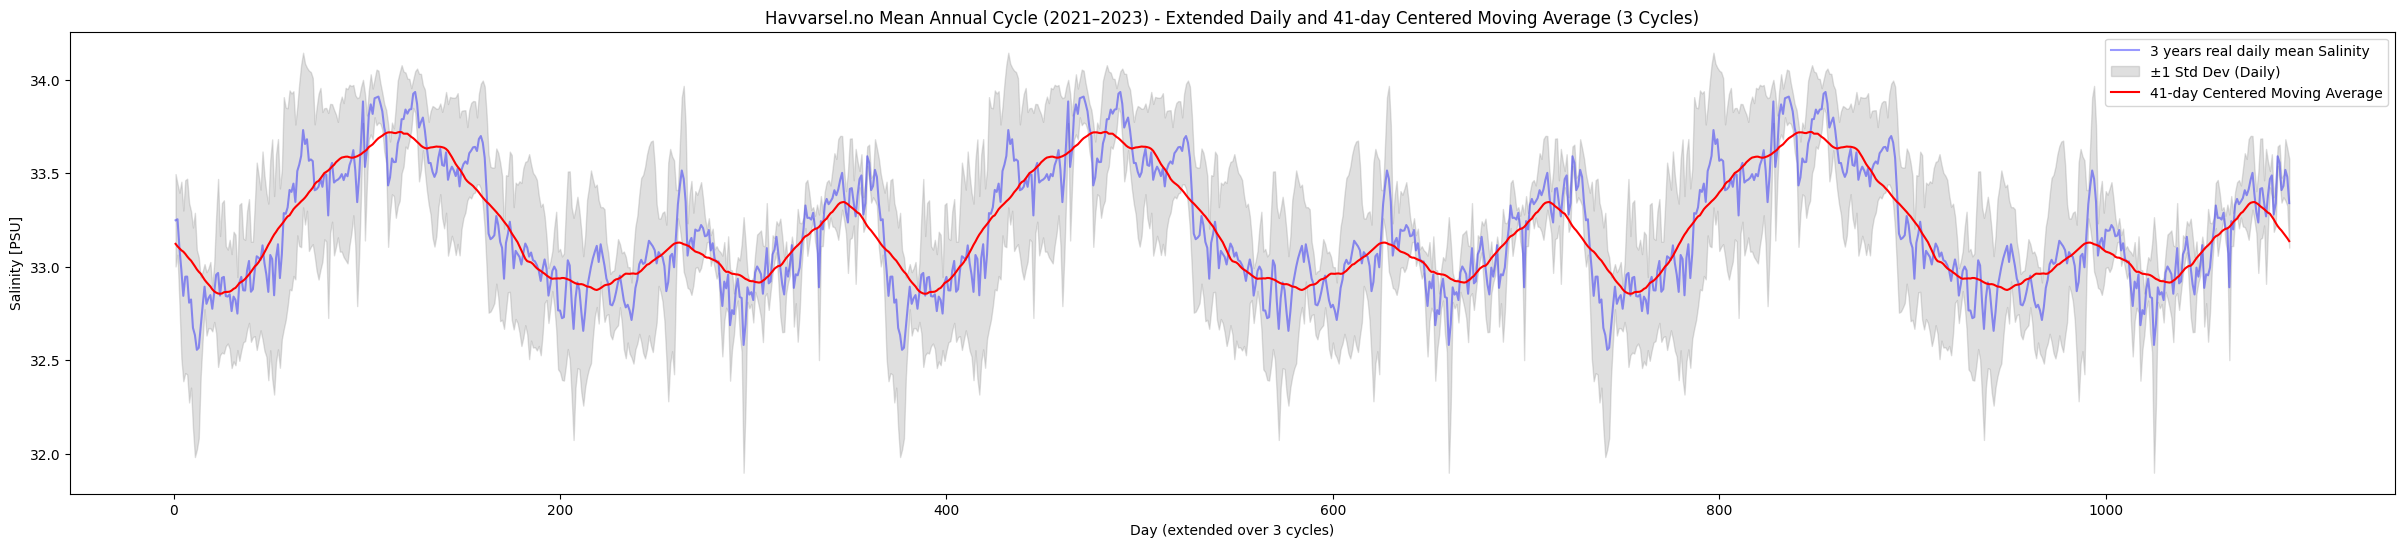

day_of_year
1     33.121814
2     33.108530
3     33.098295
4     33.087427
5     33.080214
6     33.068739
7     33.054657
8     33.042446
9     33.032285
10    33.017201
Name: salinity, dtype: float64 day_of_year
356    33.268283
357    33.252586
358    33.233970
359    33.217291
360    33.204039
361    33.192926
362    33.179136
363    33.165053
364    33.152040
365    33.136486
Name: salinity, dtype: float64


In [170]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load the dataset (3 years of data) and parse the 'time' column as datetime
df_loaded = pd.read_csv('data/havvarsel_salinity_and_temperature_2021_to_2023.csv', parse_dates=['time'])

# 2. Ensure 'time' is in datetime format
df_loaded['time'] = pd.to_datetime(df_loaded['time'])

# 3. Create a "day_of_year" column (1–365 or 1–366 for leap years)
df_loaded['day_of_year'] = df_loaded['time'].dt.dayofyear

# 4. Group by 'day_of_year' and calculate mean and std across all years
grouped = df_loaded.groupby('day_of_year')['salinity']
mean_annual_cycle = grouped.mean()    # Daily mean for each day-of-year
std_annual_cycle  = grouped.std()       # Daily std dev for each day-of-year

# 4b. Compute the 7-day moving average (a 7-point moving average)
# This takes the mean over 7 consecutive days, stepping one day at a time.
rolling_size = 41

frames = [mean_annual_cycle[345:365], mean_annual_cycle, mean_annual_cycle[:20]]

mean_annual_cycle_extended = pd.concat(frames)

#mean_annual_cycle_extended = mean_annual_cycle[345:365] + mean_annual_cycle + mean_annual_cycle[:20]

moving_avg = mean_annual_cycle_extended.rolling(window=rolling_size, min_periods=rolling_size, center=True).mean()

#moving_avg[1] = mean_annual_cycle[1]
#moving_avg[365] = mean_annual_cycle[1]

print(len(moving_avg))
print(moving_avg)
print("OK", len(mean_annual_cycle))

moving_avg = moving_avg[:405-20]
print(len(moving_avg))
moving_avg = moving_avg[20:]
print(len(moving_avg))

print(len(moving_avg))
print("OK", mean_annual_cycle)

moving_avg = moving_avg.interpolate()

# ----------------------------------------------------------------------------
# Create a dummy daily DateTimeIndex to resample the daily means to weekly means.
n_days = mean_annual_cycle.index.max()  # typically 365 or 366
daily_dates = pd.date_range('2000-01-01', periods=n_days, freq='D')
print("N_DAYS", n_days)
print("DAILY_DATES", daily_dates)
# Align the mean annual cycle with this dummy date index
mean_annual_cycle_daily = pd.Series(mean_annual_cycle.values, index=daily_dates)

# Now resample to weekly frequency
mean_weekly_cycle = mean_annual_cycle_daily.resample('W').mean()

import numpy as np
import matplotlib.pyplot as plt

# Convert the index to a NumPy array (if not already)
days = mean_annual_cycle.index.to_numpy()  # e.g. days 0-364

# Create an extended index for three cycles
extended_index = np.concatenate([
    days,
    days + 365,
    days + 2 * 365
])

# Duplicate the values for the extended cycles
extended_mean = np.concatenate([
    mean_annual_cycle.values,
    mean_annual_cycle.values,
    mean_annual_cycle.values
])
extended_std_lower = np.concatenate([
    mean_annual_cycle.values - std_annual_cycle.values,
    mean_annual_cycle.values - std_annual_cycle.values,
    mean_annual_cycle.values - std_annual_cycle.values
])
extended_std_upper = np.concatenate([
    mean_annual_cycle.values + std_annual_cycle.values,
    mean_annual_cycle.values + std_annual_cycle.values,
    mean_annual_cycle.values + std_annual_cycle.values
])
extended_moving_avg = np.concatenate([
    moving_avg.values,
    moving_avg.values,
    moving_avg.values
])

# Use a wider figure for the extended plot (here scaled to show three cycles)
plt.figure(figsize=(30, 6))

# (a) Plot the extended daily mean annual cycle
plt.plot(
    extended_index,
    extended_mean,
    label='3 years real daily mean Salinity',
    marker='',
    linestyle='-',
    color='blue',
    alpha=0.4
)

# (b) Plot ±1 standard deviation shading for the extended daily cycle
plt.fill_between(
    extended_index,
    extended_std_lower,
    extended_std_upper,
    alpha=0.25,
    color='gray',
    label='±1 Std Dev (Daily)'
)

# (c) Plot the 7-day moving average computed from the daily mean cycle
plt.plot(
    extended_index,
    extended_moving_avg,
    label=f'{rolling_size}-day Centered Moving Average',
    color='red'
)

# Add labels, title, and legend
plt.title(f"Havvarsel.no Mean Annual Cycle (2021–2023) - Extended Daily and {rolling_size}-day Centered Moving Average (3 Cycles)")
plt.xlabel("Day (extended over 3 cycles)")
plt.ylabel("Salinity [PSU]")
plt.legend()

plt.show()

print(moving_avg[:10], moving_avg[355:])


# 17 day moving average for the one year mean temperature change.

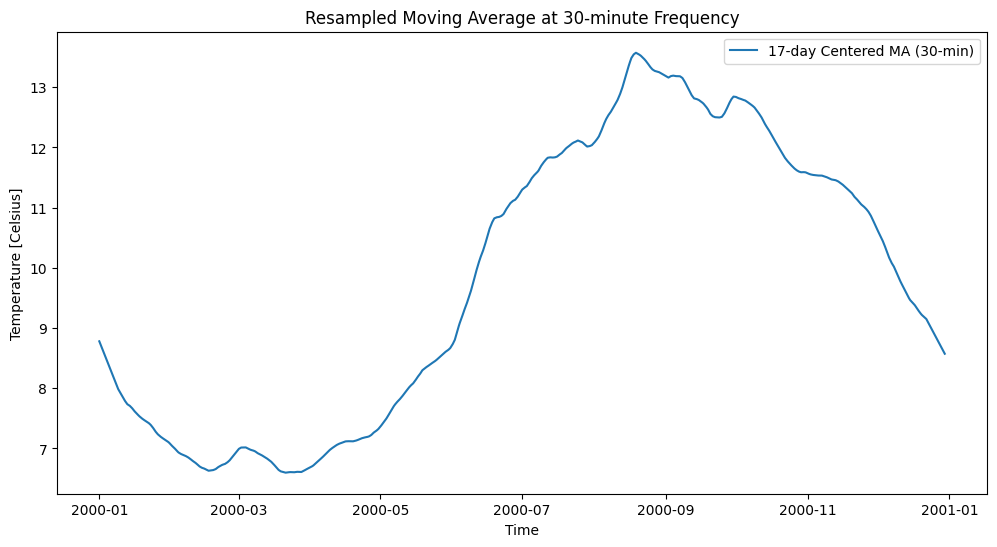

2000-01-01 00:00:00    8.779305
2000-01-01 00:30:00    8.777260
2000-01-01 01:00:00    8.775215
2000-01-01 01:30:00    8.773170
2000-01-01 02:00:00    8.771125
                         ...   
2000-12-29 22:00:00    8.578560
2000-12-29 22:30:00    8.577045
2000-12-29 23:00:00    8.575530
2000-12-29 23:30:00    8.574015
2000-12-30 00:00:00    8.572500
Freq: 30T, Name: temperature, Length: 17473, dtype: float64


In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load the observed dataset (3 years of data) and parse the 'time' column
df_loaded = pd.read_csv('data/havvarsel_salinity_and_temperature_2021_to_2023.csv', parse_dates=['time'])
df_loaded['time'] = pd.to_datetime(df_loaded['time'])

# 2. Create a "day_of_year" column (values from 1 to 365 or 366)
df_loaded['day_of_year'] = df_loaded['time'].dt.dayofyear

# 3. Group by 'day_of_year' to calculate the daily mean temperature
grouped = df_loaded.groupby('day_of_year')['temperature']
mean_annual_cycle = grouped.mean()    # Daily mean for each day-of-year

# 4. Compute a centered 17-day moving average:
#    For each day (when possible), the value is the average of 8 days before and 8 days after, plus the day itself.
rolling_size = 17
moving_avg = mean_annual_cycle.rolling(window=rolling_size, min_periods=rolling_size, center=True).mean()

# Optionally, set edge values if needed (here we simply copy the original values)
moving_avg.iloc[0] = mean_annual_cycle.iloc[0]
moving_avg.iloc[-1] = mean_annual_cycle.iloc[-1]

# Interpolate to fill any remaining missing values
moving_avg = moving_avg.interpolate()

# ----------------------------------------------------------------------------
# Convert the daily moving average into a time series with a datetime index.
# Create a dummy datetime index for a non-leap year (365 days)
dummy_dates = pd.date_range(start='2000-01-01', periods=len(moving_avg), freq='D')
moving_avg.index = dummy_dates

# Resample the data to every 30 minutes and interpolate to fill values between days.
moving_avg_30min = moving_avg.resample('30T').interpolate()

# ----------------------------------------------------------------------------
# Plotting the resampled 30-min moving average
plt.figure(figsize=(12, 6))
plt.plot(moving_avg_30min.index, moving_avg_30min.values, label='17-day Centered MA (30-min)')
plt.xlabel("Time")
plt.ylabel("Temperature [Celsius]")
plt.title("Resampled Moving Average at 30-minute Frequency")
plt.legend()
plt.show()

# Display the resulting resampled series (optional)
print(moving_avg_30min)


# Adding the mean year tempeaturer to the synthetic dataset

day_of_year
1      8.534153
2      8.479393
3      8.432728
4      8.388152
5      8.346285
         ...   
361    8.830259
362    8.772578
363    8.714448
364    8.655002
365    8.592837
Name: temperature, Length: 365, dtype: float64
moving 30 min 2024-01-01 00:00:00    8.534153
2024-01-01 00:30:00    8.533012
2024-01-01 01:00:00    8.531871
2024-01-01 01:30:00    8.530730
2024-01-01 02:00:00    8.529590
                         ...   
2024-12-31 21:30:00    8.536624
2024-12-31 22:00:00    8.536006
2024-12-31 22:30:00    8.535388
2024-12-31 23:00:00    8.534771
2024-12-31 23:30:00    8.534153
Freq: 30T, Name: temperature, Length: 17568, dtype: float64


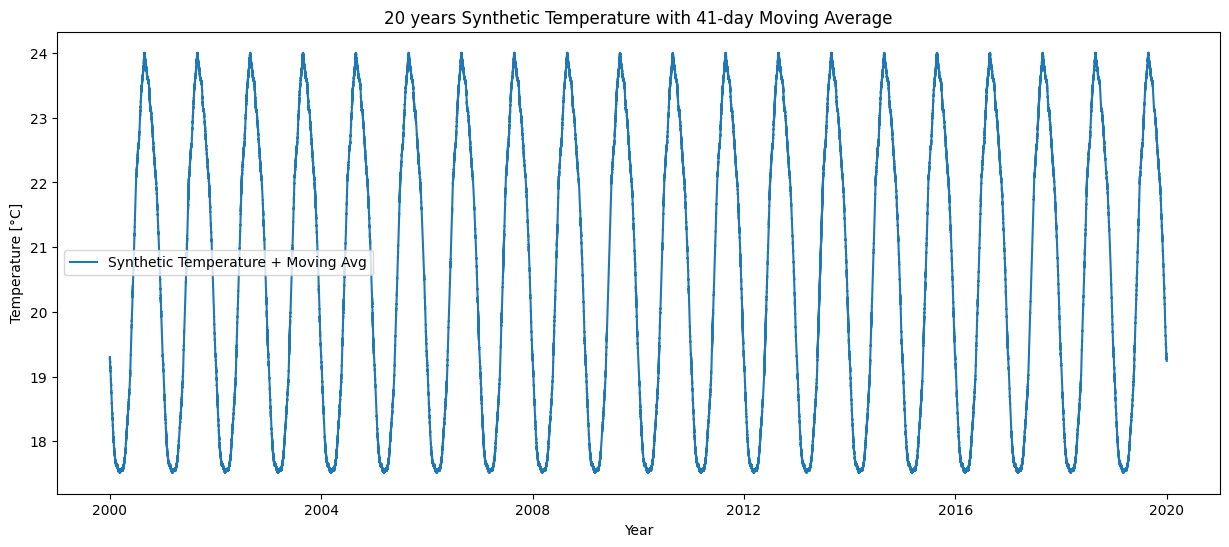

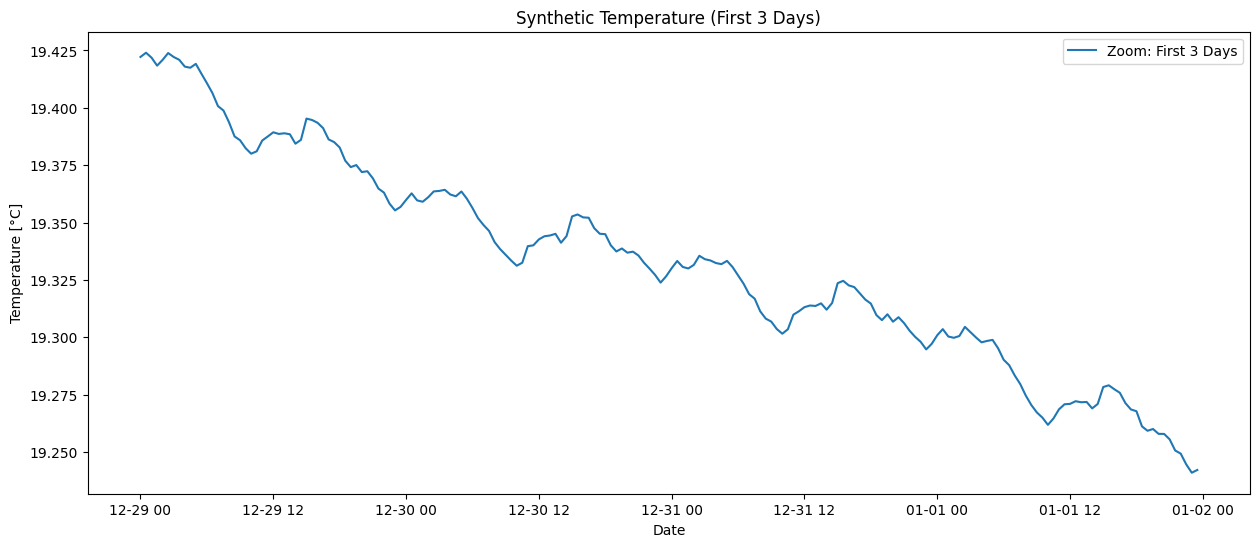

In [171]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# -------------------------------
# Part 1: Compute the moving average
# -------------------------------

# 1. Load the observed dataset (3 years of data) and parse the 'time' column
df_loaded = pd.read_csv('data/havvarsel_salinity_and_temperature_2021_to_2023.csv', parse_dates=['time'])
df_loaded['time'] = pd.to_datetime(df_loaded['time'])

# 2. Create a "day_of_year" column (values from 1 to 365 or 366)
df_loaded['day_of_year'] = df_loaded['time'].dt.dayofyear

# 3. Group by 'day_of_year' to calculate the daily mean temperature
grouped = df_loaded.groupby('day_of_year')['temperature']
mean_annual_cycle = grouped.mean()    # Daily mean for each day-of-year

# 4. Compute a centered x-day moving average:
#    For each day (when possible), the value is the average of 8 days before and 8 days after plus the day itself.
rolling_size = 41

frames = [mean_annual_cycle[345:365], mean_annual_cycle, mean_annual_cycle[:20]]

mean_annual_cycle_extended = pd.concat(frames)

moving_avg = mean_annual_cycle_extended.rolling(window=rolling_size, min_periods=rolling_size, center=True).mean()

# Optionally, fill edge values if desired (here we simply set the first and last values to the original values)
#moving_avg.iloc[0] = mean_annual_cycle.iloc[0]
#moving_avg.iloc[-1] = mean_annual_cycle.iloc[-1]

moving_avg = moving_avg[:405-20]
moving_avg = moving_avg[20:]

moving_avg = moving_avg.interpolate()

print(moving_avg)
# -------------------------------
# Part 2: Upsample to 30-minute frequency
# -------------------------------

# Create a dummy datetime index for one non-leap year (e.g., year 2000) with daily frequency
dummy_dates = pd.date_range(start='2024-01-01', periods=len(moving_avg), freq='D')
moving_avg.index = dummy_dates

moving_avg['2024-12-31 23:30:00'] = moving_avg[0]

# Resample the daily moving average to 30-minute intervals and interpolate in between
moving_avg_30min = moving_avg.resample('30T').interpolate()

print("moving 30 min", moving_avg_30min)

# -------------------------------
# Part 3: Map the moving average to the synthetic data and add it
# -------------------------------

# Load the synthetic 3-year dataset with a 'Date' column
df_synthetic = pd.read_csv('data/synthetic_data_normal.csv', parse_dates=['Date'])

# For each row, create a dummy datetime by replacing the year with 2000 so it matches the dummy index
df_synthetic['dummy_time'] = df_synthetic['Date'].apply(lambda x: x.replace(year=2024))

# Map each synthetic row to its corresponding 30-min moving average value using the dummy datetime.
# (This works best if your synthetic data timestamps align with 30-min increments.)
df_synthetic['moving_avg'] = df_synthetic['dummy_time'].map(moving_avg_30min.to_dict())

# Add the moving average value to the synthetic temperature.
# (Here we overwrite the Temperature column, but you can also store it in a new column.)
df_synthetic['Temperature'] = df_synthetic['Temperature'] + df_synthetic['moving_avg']

# -------------------------------
# Part 4: Plot the updated synthetic temperature
# -------------------------------

plt.figure(figsize=(15, 6))
plt.plot(df_synthetic['Date'], df_synthetic['Temperature'], label='Synthetic Temperature + Moving Avg')
plt.xlabel("Year")
plt.ylabel("Temperature [°C]")
plt.title(f"20 years Synthetic Temperature with {rolling_size}-day Moving Average")
plt.legend()
plt.show()

# Optional: Zoom in on the first 3 days (adjust the slicing as needed)
plt.figure(figsize=(15, 6))
# Assuming 48 intervals per day at 30-min frequency; 3 days ~ 48*3 data points
plt.plot(df_synthetic['Date'][48*363:48*367], df_synthetic['Temperature'][48*363:48*367], label='Zoom: First 3 Days')
plt.xlabel("Date")
plt.ylabel("Temperature [°C]")
plt.title("Synthetic Temperature (First 3 Days)")
plt.legend()
plt.show()

df_synthetic.drop(columns=['dummy_time', 'moving_avg'], inplace=True)
# Save the updated synthetic DataFrame to a CSV file
df_synthetic.to_csv('data/df_synthetic_with_sesonal_temperature.csv', index=False)


# Adding sesonal variations to salinity

day_of_year
1      33.121814
2      33.108530
3      33.098295
4      33.087427
5      33.080214
         ...    
361    33.192926
362    33.179136
363    33.165053
364    33.152040
365    33.136486
Name: salinity, Length: 365, dtype: float64
moving 30 min 2024-01-01 00:00:00    33.121814
2024-01-01 00:30:00    33.121537
2024-01-01 01:00:00    33.121260
2024-01-01 01:30:00    33.120983
2024-01-01 02:00:00    33.120707
                         ...    
2024-12-31 21:30:00    33.122431
2024-12-31 22:00:00    33.122277
2024-12-31 22:30:00    33.122123
2024-12-31 23:00:00    33.121968
2024-12-31 23:30:00    33.121814
Freq: 30T, Name: salinity, Length: 17568, dtype: float64


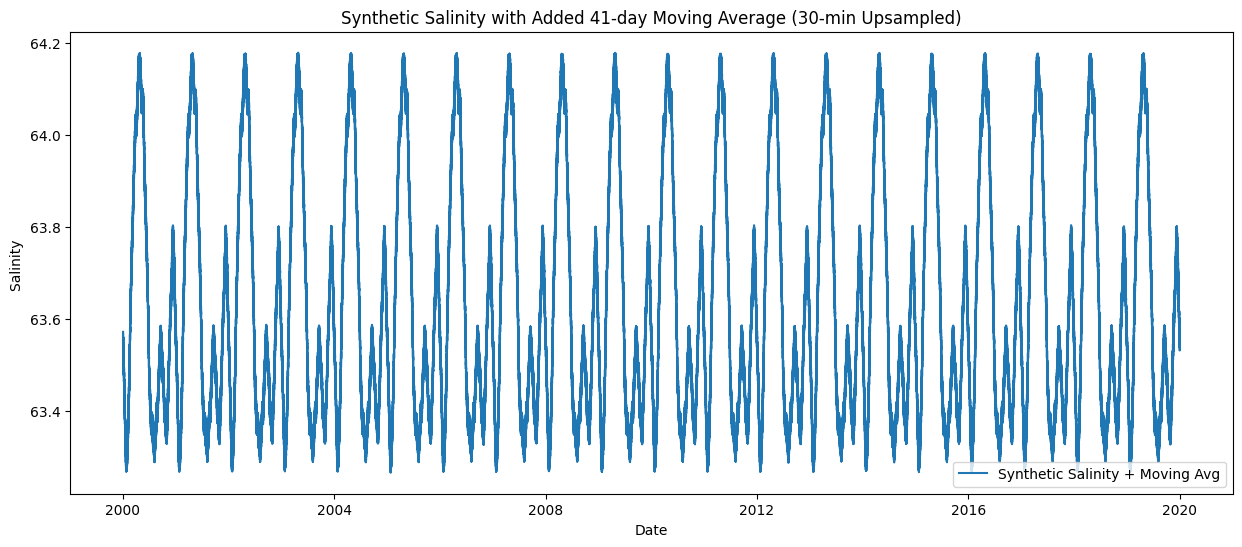

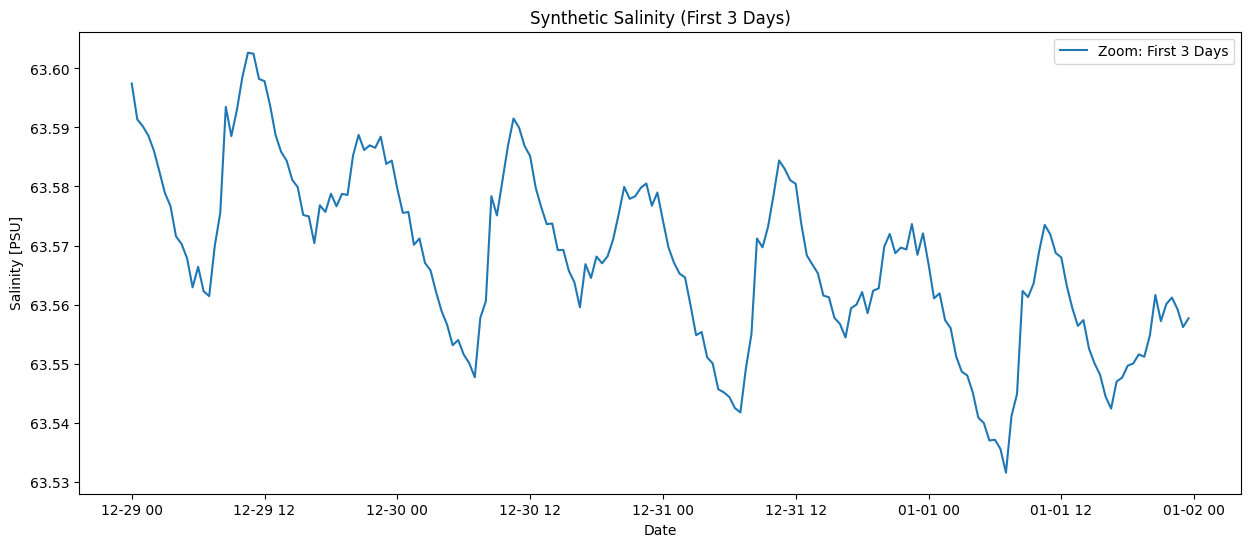

In [172]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# -------------------------------
# Part 1: Compute the moving average
# -------------------------------

# 1. Load the observed dataset (3 years of data) and parse the 'time' column
df_loaded = pd.read_csv('data/havvarsel_salinity_and_temperature_2021_to_2023.csv', parse_dates=['time'])
df_loaded['time'] = pd.to_datetime(df_loaded['time'])

# 2. Create a "day_of_year" column (values from 1 to 365 or 366)
df_loaded['day_of_year'] = df_loaded['time'].dt.dayofyear

# 3. Group by 'day_of_year' to calculate the daily mean temperature
grouped = df_loaded.groupby('day_of_year')['salinity']
mean_annual_cycle = grouped.mean()    # Daily mean for each day-of-year

# 4. Compute a centered x-day moving average:
#    For each day (when possible), the value is the average of 8 days before and 8 days after plus the day itself.
rolling_size = 41

frames = [mean_annual_cycle[345:365], mean_annual_cycle, mean_annual_cycle[:20]]

mean_annual_cycle_extended = pd.concat(frames)

moving_avg = mean_annual_cycle_extended.rolling(window=rolling_size, min_periods=rolling_size, center=True).mean()

# Optionally, fill edge values if desired (here we simply set the first and last values to the original values)
#moving_avg.iloc[0] = mean_annual_cycle.iloc[0]
#moving_avg.iloc[-1] = mean_annual_cycle.iloc[-1]

moving_avg = moving_avg[:405-20]
moving_avg = moving_avg[20:]

moving_avg = moving_avg.interpolate()

print(moving_avg)
# -------------------------------
# Part 2: Upsample to 30-minute frequency
# -------------------------------

# Create a dummy datetime index for one non-leap year (e.g., year 2000) with daily frequency
dummy_dates = pd.date_range(start='2024-01-01', periods=len(moving_avg), freq='D')
moving_avg.index = dummy_dates

moving_avg['2024-12-31 23:30:00'] = moving_avg[0]

# Resample the daily moving average to 30-minute intervals and interpolate in between
moving_avg_30min = moving_avg.resample('30T').interpolate()

print("moving 30 min", moving_avg_30min)

# -------------------------------
# Part 3: Map the moving average to the synthetic data and add it
# -------------------------------

# Load the synthetic 3-year dataset with a 'Date' column
df_synthetic = pd.read_csv('data/df_synthetic_with_sesonal_temperature.csv', parse_dates=['Date'])

# For each row, create a dummy datetime by replacing the year with 2000 so it matches the dummy index
df_synthetic['dummy_time'] = df_synthetic['Date'].apply(lambda x: x.replace(year=2024))

# Map each synthetic row to its corresponding 30-min moving average value using the dummy datetime.
# (This works best if your synthetic data timestamps align with 30-min increments.)
df_synthetic['moving_avg'] = df_synthetic['dummy_time'].map(moving_avg_30min.to_dict())

# Add the moving average value to the synthetic temperature.
# (Here we overwrite the Temperature column, but you can also store it in a new column.)
df_synthetic['Salinity'] = df_synthetic['Salinity'] + df_synthetic['moving_avg']

# -------------------------------
# Part 4: Plot the updated synthetic temperature
# -------------------------------

plt.figure(figsize=(15, 6))
plt.plot(df_synthetic['Date'], df_synthetic['Salinity'], label='Synthetic Salinity + Moving Avg')
plt.xlabel("Date")
plt.ylabel("Salinity ")
plt.title(f"Synthetic Salinity with Added {rolling_size}-day Moving Average (30-min Upsampled)")
plt.legend()
plt.show()

# Optional: Zoom in on the first 3 days (adjust the slicing as needed)
plt.figure(figsize=(15, 6))
# Assuming 48 intervals per day at 30-min frequency; 3 days ~ 48*3 data points
plt.plot(df_synthetic['Date'][48*363:48*367], df_synthetic['Salinity'][48*363:48*367], label='Zoom: First 3 Days')
plt.xlabel("Date")
plt.ylabel("Salinity [PSU]")
plt.title("Synthetic Salinity (First 3 Days)")
plt.legend()
plt.show()

df_synthetic.drop(columns=['dummy_time', 'moving_avg'], inplace=True)
# Save the updated synthetic DataFrame to a CSV file
df_synthetic.to_csv('data/df_synthetic_with_sesonal_salinity.csv', index=False)


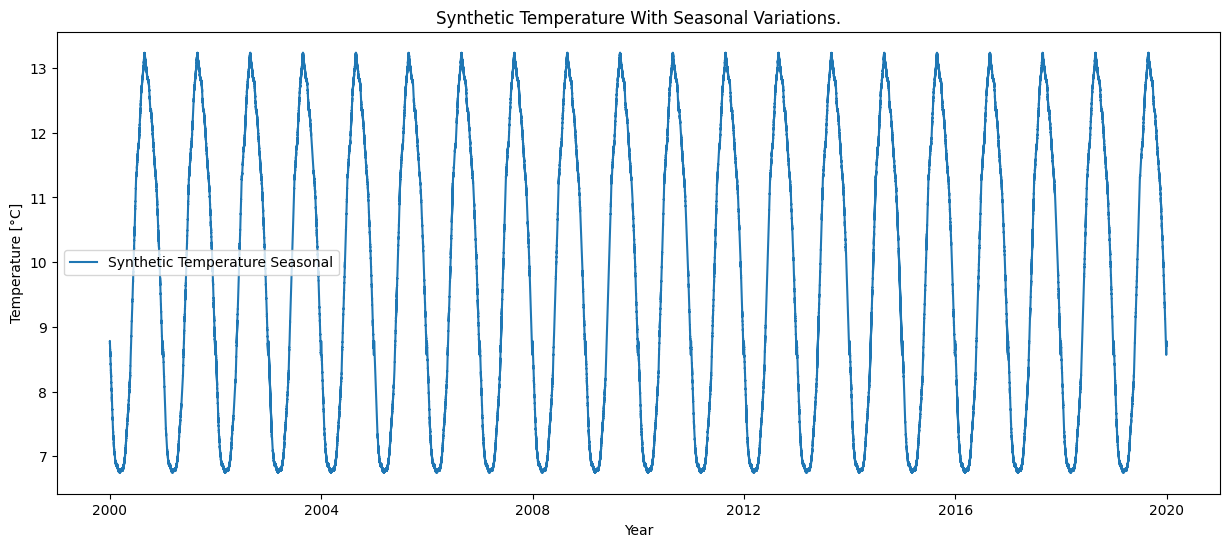

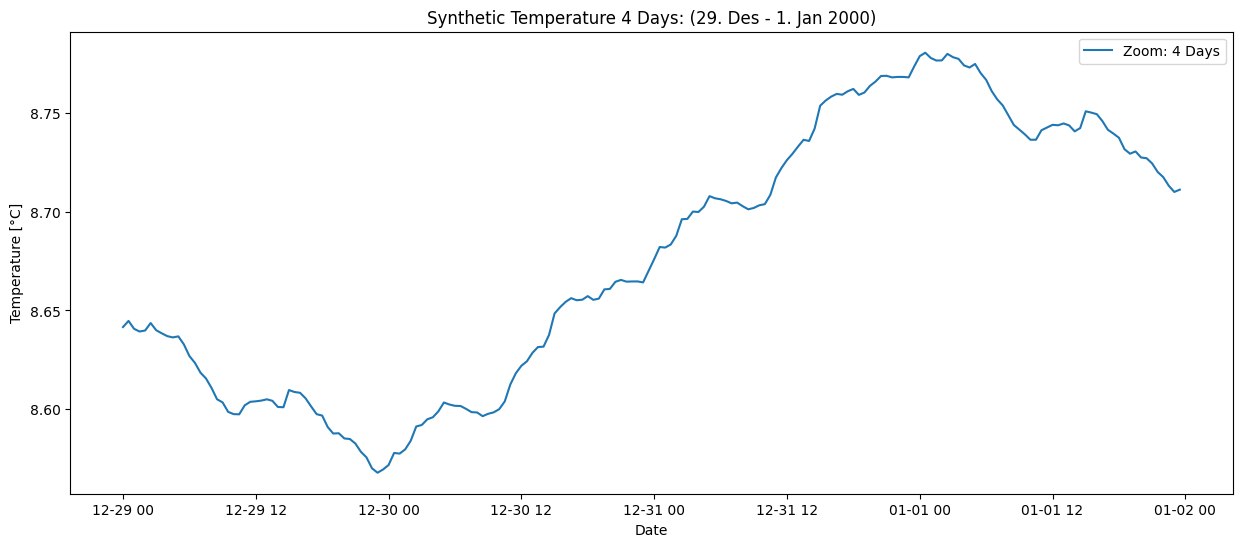

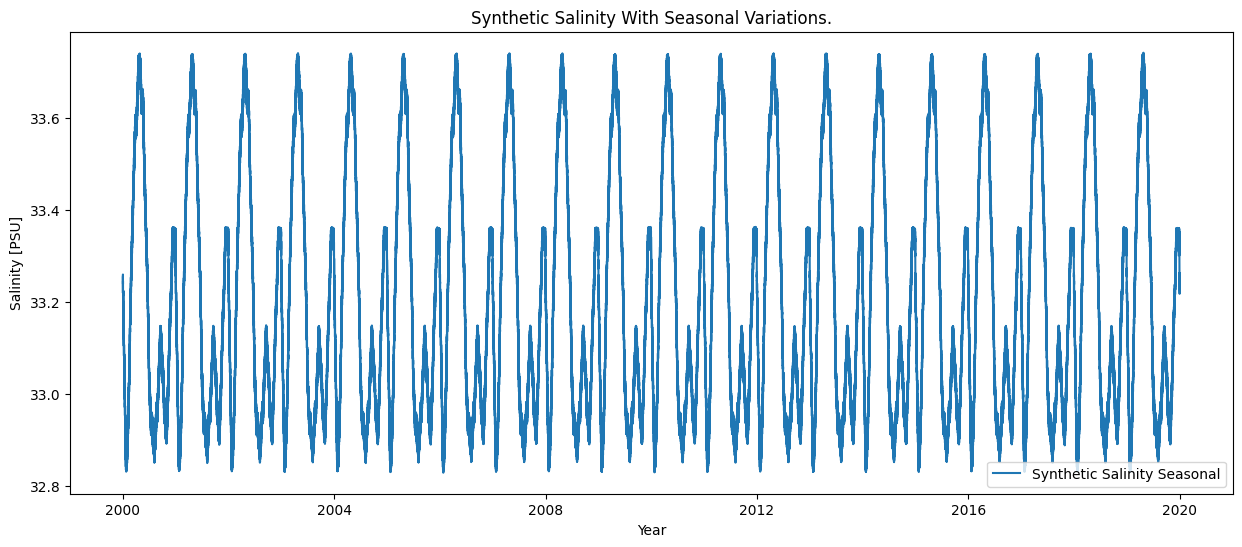

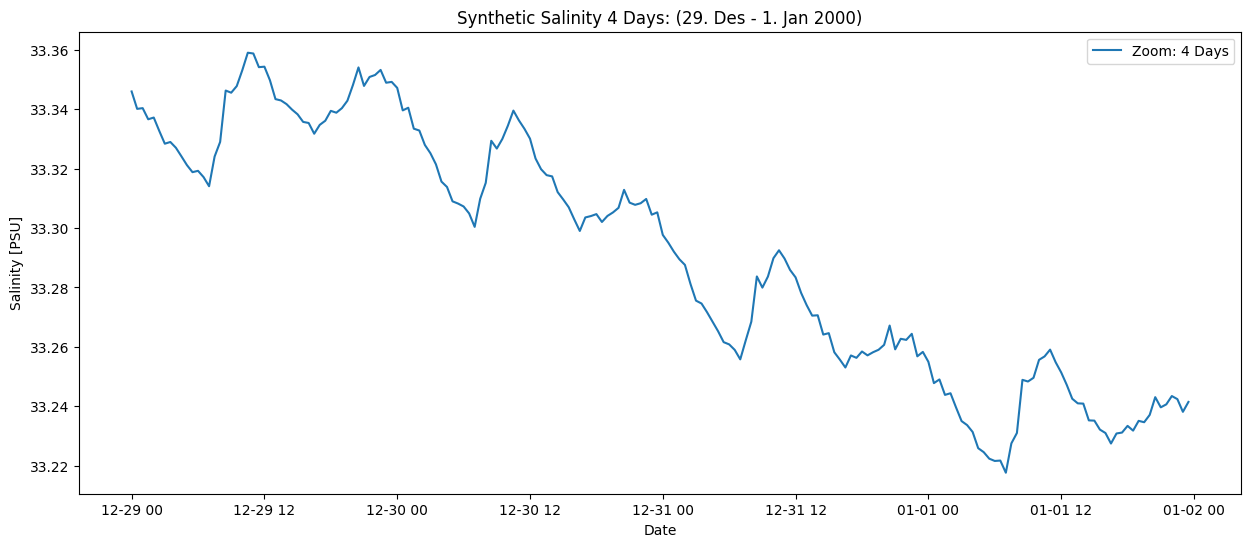

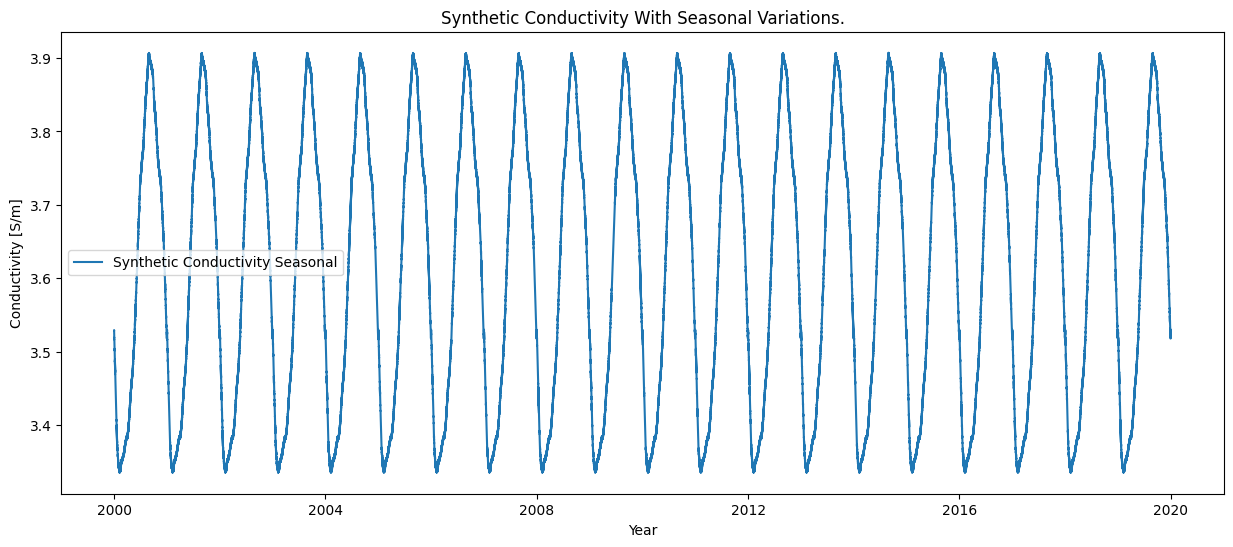

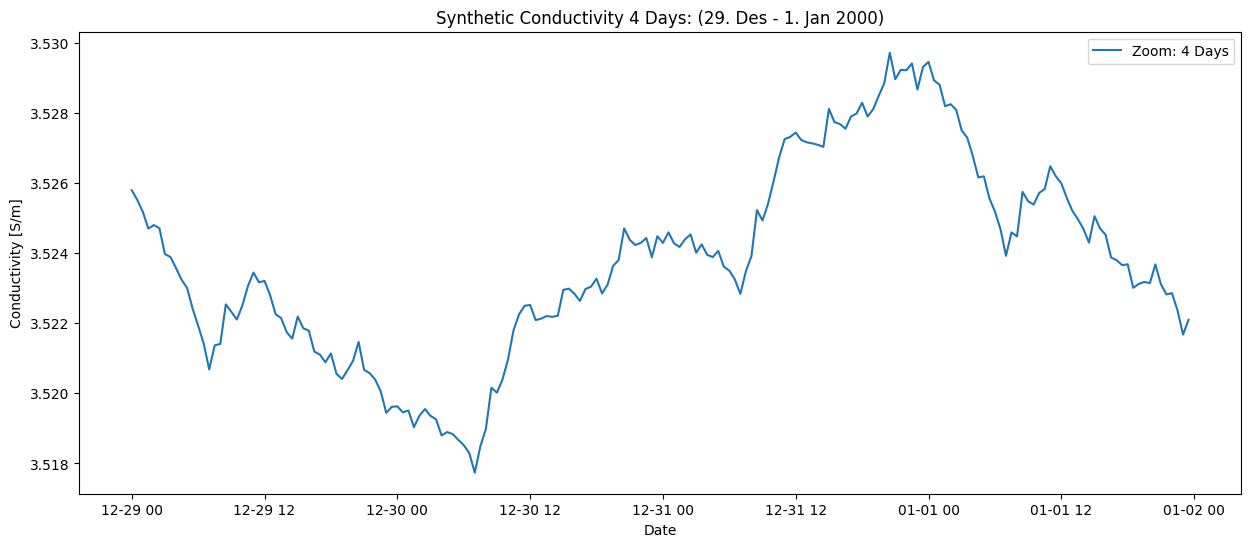

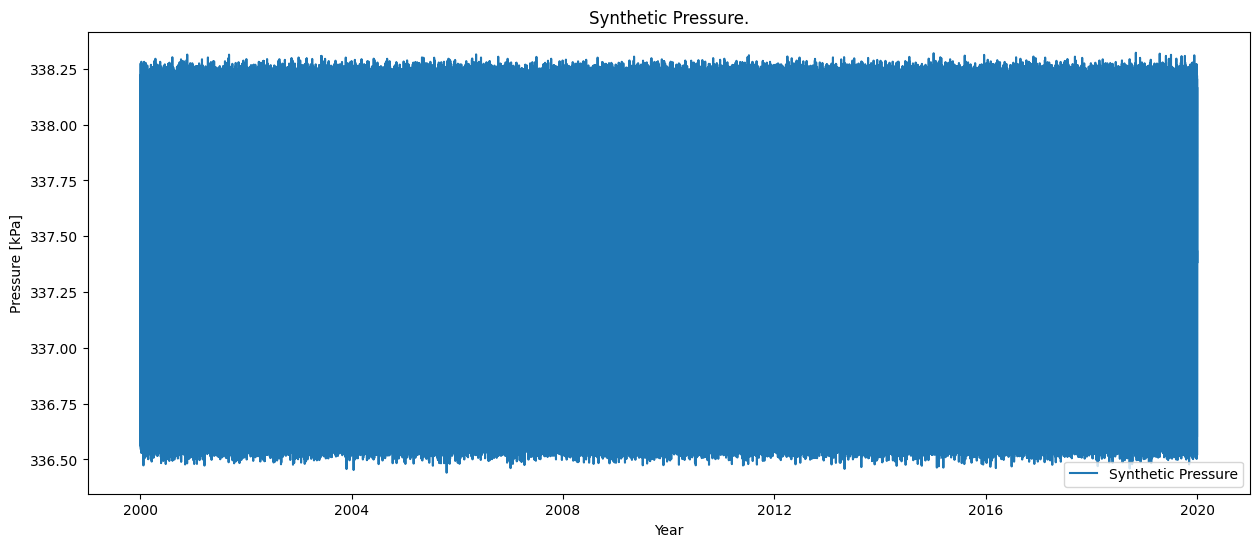

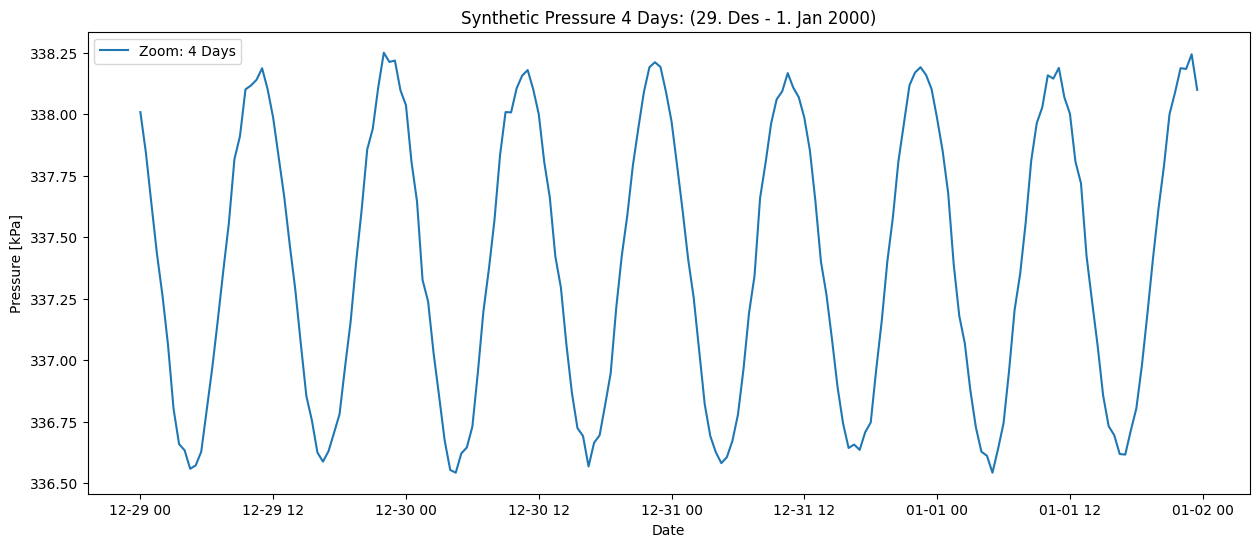

In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Load the synthetic 3-year dataset with a 'Date' column
df_synthetic = pd.read_csv('data/synthetic_20_years_sesonal_temp_conduc_salinity-kopi.csv', parse_dates=['Date'])

# -------------------------------
# Part 1: Plot the updated synthetic temperature
# -------------------------------

plt.figure(figsize=(15, 6))
plt.plot(df_synthetic['Date'], df_synthetic['Temperature'], label='Synthetic Temperature Seasonal')
plt.xlabel("Year")
plt.ylabel("Temperature [°C]")
plt.title(f"Synthetic Temperature With Seasonal Variations.")
plt.legend()
plt.show()

# Optional: Zoom in on the first 3 days (adjust the slicing as needed)
plt.figure(figsize=(15, 6))
# Assuming 48 intervals per day at 30-min frequency; 3 days ~ 48*3 data points
plt.plot(df_synthetic['Date'][48*363:48*367], df_synthetic['Temperature'][48*363:48*367], label='Zoom: 4 Days')
plt.xlabel("Date")
plt.ylabel("Temperature [°C]")
plt.title("Synthetic Temperature 4 Days: (29. Des - 1. Jan 2000)")
plt.legend()
plt.show()

# -------------------------------
# Part 2: Plot the updated synthetic salinity
# -------------------------------

plt.figure(figsize=(15, 6))
plt.plot(df_synthetic['Date'], df_synthetic['Salinity'], label='Synthetic Salinity Seasonal')
plt.xlabel("Year")
plt.ylabel("Salinity [PSU]")
plt.title(f"Synthetic Salinity With Seasonal Variations.")
plt.legend()
plt.show()

# Optional: Zoom in on the first 3 days (adjust the slicing as needed)
plt.figure(figsize=(15, 6))
# Assuming 48 intervals per day at 30-min frequency; 3 days ~ 48*3 data points
plt.plot(df_synthetic['Date'][48*363:48*367], df_synthetic['Salinity'][48*363:48*367], label='Zoom: 4 Days')
plt.xlabel("Date")
plt.ylabel("Salinity [PSU]")
plt.title("Synthetic Salinity 4 Days: (29. Des - 1. Jan 2000)")
plt.legend()
plt.show()

# -------------------------------
# Part 3: Plot the updated synthetic conductivity
# -------------------------------

plt.figure(figsize=(15, 6))
plt.plot(df_synthetic['Date'], df_synthetic['Conductivity'], label='Synthetic Conductivity Seasonal')
plt.xlabel("Year")
plt.ylabel("Conductivity [S/m]")
plt.title(f"Synthetic Conductivity With Seasonal Variations.")
plt.legend()
plt.show()

# Optional: Zoom in on the first 3 days (adjust the slicing as needed)
plt.figure(figsize=(15, 6))
# Assuming 48 intervals per day at 30-min frequency; 3 days ~ 48*3 data points
plt.plot(df_synthetic['Date'][48*363:48*367], df_synthetic['Conductivity'][48*363:48*367], label='Zoom: 4 Days')
plt.xlabel("Date")
plt.ylabel("Conductivity [S/m]")
plt.title("Synthetic Conductivity 4 Days: (29. Des - 1. Jan 2000)")
plt.legend()
plt.show()

# -------------------------------
# Part 4: Plot the updated synthetic pressure
# -------------------------------

plt.figure(figsize=(15, 6))
plt.plot(df_synthetic['Date'], df_synthetic['Pressure'], label='Synthetic Pressure')
plt.xlabel("Year")
plt.ylabel("Pressure [kPa]")
plt.title(f"Synthetic Pressure.")
plt.legend()
plt.show()

# Optional: Zoom in on the first 3 days (adjust the slicing as needed)
plt.figure(figsize=(15, 6))
# Assuming 48 intervals per day at 30-min frequency; 3 days ~ 48*3 data points
plt.plot(df_synthetic['Date'][48*363:48*367], df_synthetic['Pressure'][48*363:48*367], label='Zoom: 4 Days')
plt.xlabel("Date")
plt.ylabel("Pressure [kPa]")
plt.title("Synthetic Pressure 4 Days: (29. Des - 1. Jan 2000)")
plt.legend()
plt.show()



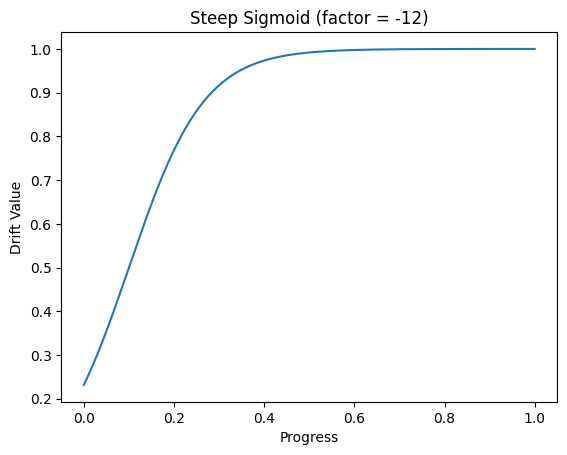

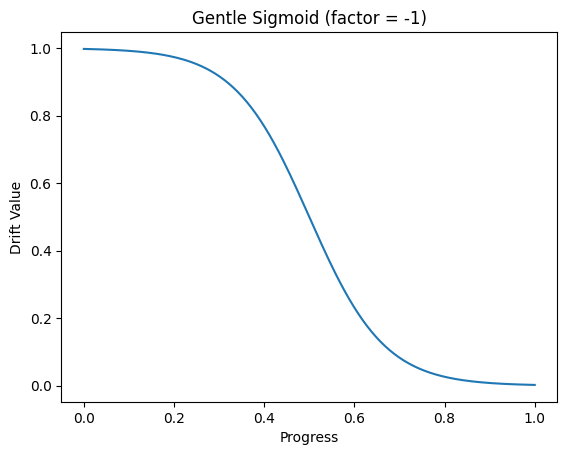

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a range of progress values from 0 to 1
progress = np.linspace(0, 1, 200)

# Choose an offset for demonstration
offset = 1.0

# ----- Steep Sigmoid (factor -12) -----
drift_steep = offset / (1 + np.exp(-12 * (progress - 0.1)))

plt.figure()
plt.plot(progress, drift_steep)
plt.title("Steep Sigmoid (factor = -12)")
plt.xlabel("Progress")
plt.ylabel("Drift Value")
plt.show()

# ----- Gentle Sigmoid (factor -1) -----
drift_gentle = offset / (1 + np.exp(12 * (progress - 0.5)))

plt.figure()
plt.plot(progress, drift_gentle)
plt.title("Gentle Sigmoid (factor = -1)")
plt.xlabel("Progress")
plt.ylabel("Drift Value")
plt.show()
